Shashwat Shekhar
BTECH/60132/20

Basic Kalman Filter Implementation

Code:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Simulating a 1D dataset with noise
np.random.seed(42)
true_position = np.linspace(0, 10, 100)  # True position values
noisy_measurements = true_position + np.random.normal(0, 1, 100)  # Adding Gaussian noise

Kalman Filter Implementation:

In [3]:
# Making Kalman Filter Function
def kalman_filter(measurements, initial_estimate, process_variance, measurement_variance):
    n = len(measurements)
    estimated_states = np.zeros(n)
    estimated_error_covariances = np.zeros(n)
    estimated_state = initial_estimate
    estimated_error_covariance = 1.0

    for i in range(n):
        # Prediction step
        predicted_state = estimated_state
        predicted_error_covariance = estimated_error_covariance + process_variance

        # Update step
        kalman_gain = predicted_error_covariance / (predicted_error_covariance + measurement_variance)
        estimated_state = predicted_state + kalman_gain * (measurements[i] - predicted_state)
        estimated_error_covariance = (1 - kalman_gain) * predicted_error_covariance

        # Save results
        estimated_states[i] = estimated_state
        estimated_error_covariances[i] = estimated_error_covariance

    return estimated_states


Setting Initial Parameters for Kalman Filter

In [4]:
initial_estimate = 0.0
process_variance = 0.1
measurement_variance = 1.0

Applying the Kalman Filter 

In [5]:
kalman_estimates = kalman_filter(noisy_measurements, initial_estimate, process_variance, measurement_variance)

Plotting:

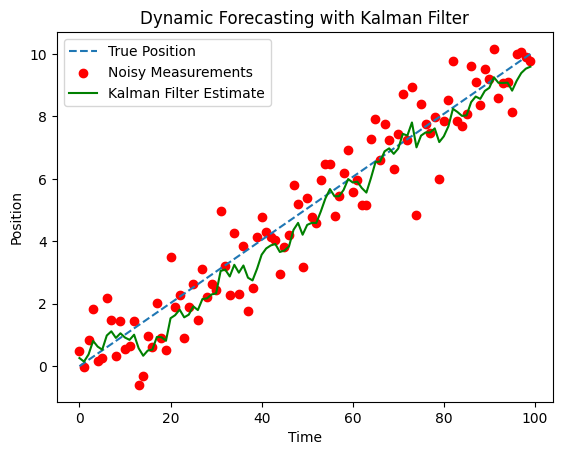

In [6]:
plt.plot(true_position, label='True Position', linestyle='dashed')
plt.scatter(range(len(noisy_measurements)), noisy_measurements, label='Noisy Measurements', color='red')
plt.plot(kalman_estimates, label='Kalman Filter Estimate', color='green')
plt.title('Dynamic Forecasting with Kalman Filter')
plt.xlabel('Time')
plt.ylabel('Position')
plt.legend()
plt.show()

In this example:

true_position represents the true position of an object.

noisy_measurements simulates noisy measurements of the true position.

The Kalman Filter is applied to estimate the true position based on the noisy measurements.